# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

<h3>Exploring the dataset</h>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('EnergyEfficiency.csv')
display(df.head())
display(df.sample(frac=0.2))
display(df.tail())
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Columns: {df.columns.tolist()}")


,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
29,0.71,710.5,269.5,220.5,3.5,3,0.00,0,6.40,11.72
247,0.90,563.5,318.5,122.5,7.0,5,0.10,5,29.02,33.01
138,0.64,784.0,343.0,220.5,3.5,4,0.10,2,15.34,19.32
740,0.76,661.5,416.5,122.5,7.0,2,0.40,5,38.82,39.37
44,0.62,808.5,367.5,220.5,3.5,2,0.00,0,8.60,12.07
...,...,...,...,...,...,...,...,...,...,...
143,0.62,808.5,367.5,220.5,3.5,5,0.10,2,13.04,14.24
12,0.82,612.5,318.5,147.0,7.0,2,0.00,0,17.05,23.77
414,0.71,710.5,269.5,220.5,3.5,4,0.25,3,12.10,15.57
301,0.82,612.5,318.5,147.0,7.0,3,0.25,1,27.27,27.84


,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


Number of rows: 768
Number of columns: 10
Columns: ['RelativeCompactness', 'SurfaceArea', 'WallArea', 'RoofArea', 'OverallHeight', 'Orientation', 'GlazingArea', 'GlazingAreaDistribution', 'HeatingLoad', 'CoolingLoad']


<h1>1.1 Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.</h>

<h3>Visualization</h>

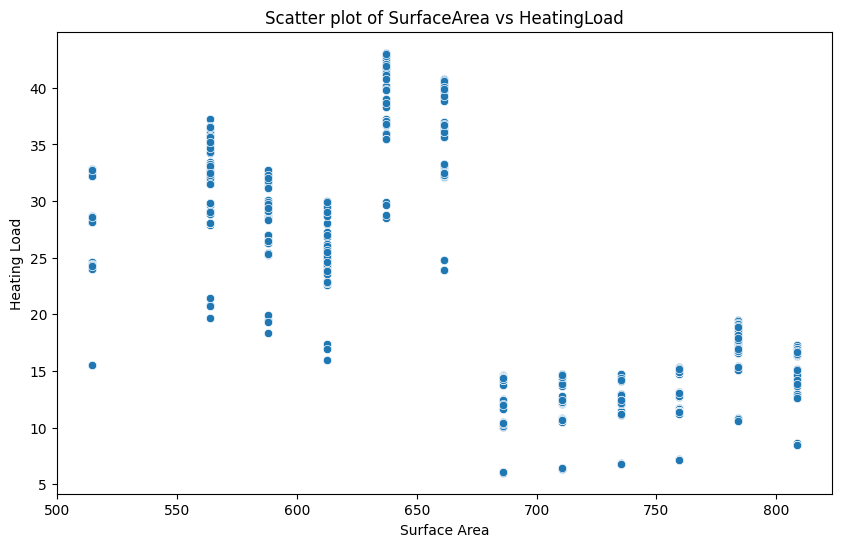

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad')
plt.title('Scatter plot of SurfaceArea vs HeatingLoad')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.show()


1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.